In [75]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import keras
import random
from PIL import Image
from numpy import asarray

In [99]:
def get_Img_dir(train_ds_gen, val_ds_gen, directory):
    train_ds = train_ds_gen.flow_from_directory(directory,
                                                    target_size=(120,120), 
                                                    batch_size=18,
                                                    subset='training',
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    seed=223)
    val_ds = val_ds_gen.flow_from_directory(directory,
                                                          target_size=(200,200),
                                                          batch_size=18,
                                                          shuffle=True,
                                                          subset='validation',
                                                          class_mode='categorical',
                                                          seed=223)
    
  
    return train_ds, val_ds

In [100]:
train_dsgen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    horizontal_flip=True, 
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
    )
val_dsgen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    horizontal_flip=True, 
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
    )

train_dataset, val_dataset = get_Img_dir(
            train_ds_gen=train_dsgen,
            val_ds_gen=val_dsgen,
            directory='/kaggle/input/african-wildlife')

Found 1204 images belonging to 4 classes.
Found 300 images belonging to 4 classes.


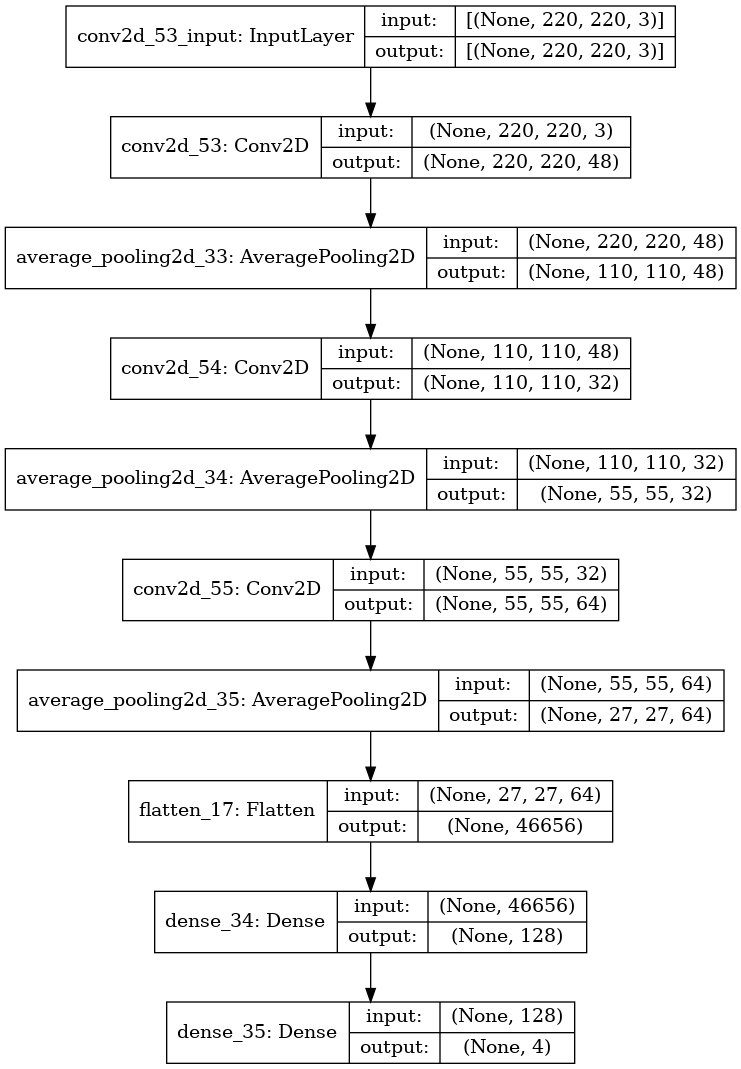

In [101]:
def cnn1(input_shape):
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(64, 3, padding='same', input_shape = input_shape, activation = 'relu'))
    model.add(tf.keras.layers.AveragePooling2D(pool_size = (3,3),strides= (1,1)))
    
    model.add(tf.keras.layers.Conv2D(32, 3, padding='same', input_shape = input_shape, activation = 'relu'))
    model.add(tf.keras.layers.AveragePooling2D(pool_size = (3,3),strides= (1,1)))
    
    model.add(tf.keras.layers.Conv2D(128, 2, padding='same', activation = 'relu'))
    model.add(tf.keras.layers.AveragePooling2D(pool_size = (3,3),strides= (1,1)))
    
    model.add(tf.keras.layers.Flatten(input_shape = (3 ,2)))
    
    model.add(tf.keras.layers.Dense(units = 128, activation = 'LeakyReLU'))
    num_classes = 4
    
    model.add(tf.keras.layers.Dense(units = num_classes, activation = 'softmax'))
    
    return model    

model = cnn1(input_shape=(120,120) + (3,))

tf.keras.utils.plot_model(model, show_shapes=True)

In [102]:
epochs = 5

model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["categorical_accuracy"],
)

tbCallBack = keras.callbacks.TensorBoard(log_dir='logs', histogram_freq=0, write_graph=True, write_images=True)

history = model.fit(
    train_dataset, epochs=epochs, callbacks=[tbCallBack],
    validation_data=val_dataset
)

2022-12-01 03:10:04.182644: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-01 03:10:04.183043: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-01 03:10:04.183466: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/5
 1/38 [..............................] - ETA: 1:19 - loss: 1.3718 - categorical_accuracy: 0.4000

2022-12-01 03:10:07.889295: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-01 03:10:07.889833: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/38 [>.............................] - ETA: 1:17 - loss: 4.7872 - categorical_accuracy: 0.3462

2022-12-01 03:10:10.072739: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-01 03:10:10.074503: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-01 03:10:10.076289: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./Graph1/train/plugins/profile/2022_12_01_03_10_10

2022-12-01 03:10:10.077586: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./Graph1/train/plugins/profile/2022_12_01_03_10_10/913ae53e8022.trace.json.gz
2022-12-01 03:10:10.080363: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./Graph1/train/plugins/profile/2022_12_01_03_10_10

2022-12-01 03:10:10.081102: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ./Graph1/train/plugins/profile/2022_12_01_03_10_10/913ae53e8022.memory_profile.json.gz
2022-12-01 03

38/38 [==============================] - 70s 2s/step - loss: 1.8130 - categorical_accuracy: 0.2924 - val_loss: 1.2750 - val_categorical_accuracy: 0.5233
Epoch 2/5
38/38 [==============================] - 73s 2s/step - loss: 1.2134 - categorical_accuracy: 0.4551 - val_loss: 1.0112 - val_categorical_accuracy: 0.5367
Epoch 3/5
38/38 [==============================] - 73s 2s/step - loss: 1.0469 - categorical_accuracy: 0.5208 - val_loss: 0.9953 - val_categorical_accuracy: 0.6067
Epoch 4/5
38/38 [==============================] - 68s 2s/step - loss: 0.9721 - categorical_accuracy: 0.5548 - val_loss: 0.9632 - val_categorical_accuracy: 0.5567
Epoch 5/5
38/38 [==============================] - 67s 2s/step - loss: 0.9645 - categorical_accuracy: 0.5640 - val_loss: 0.9122 - val_categorical_accuracy: 0.6067


In [103]:
model.save("mymodel")

In [104]:
valid_data = list(zip(val_dataset.filenames,val_dataset.classes))

rand_i = [i for i in range(0,len(valid_data))]

rand_d = []
for i in random.sample(rand_i, 4):
    rand_d.append(valid_data[i])

c_i = train_dataset.class_indices

In [105]:
c_i = {v: k for k, v in c_i.items()}

In [106]:
def img_pred(f_n, model):
    image = Image.open("/kaggle/input/african-wildlife/" +f_n[0]).convert('RGB')
    temp = np.array(image)
    plt.imshow(temp)
    plt.show()
    image = image.resize((220,220))
    image = np.array(image)
            

    pic = asarray(image)
    pic = pic.astype('float32')

    pic /= 255.0

    uu = np.array([pic])
    yy = model.predict(uu)
    yy = yy * 100
    print("Actual:", c_i[f_n[1]])
    print("Predicted", c_i[np.argmax((yy)[0])])

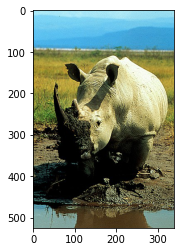

Actual: rhino
Predicted elephant


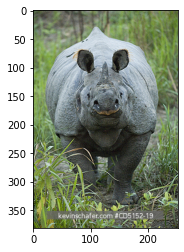

Actual: rhino
Predicted buffalo


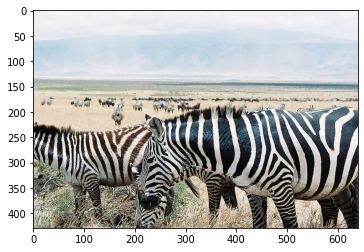

Actual: zebra
Predicted zebra


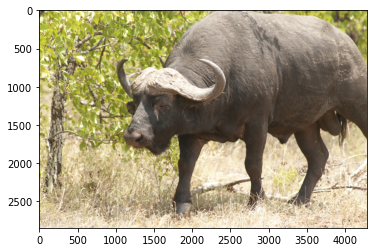

Actual: buffalo
Predicted buffalo


In [107]:
for i in r_d:
    img_pred(i, model)

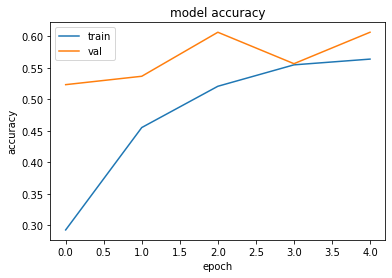

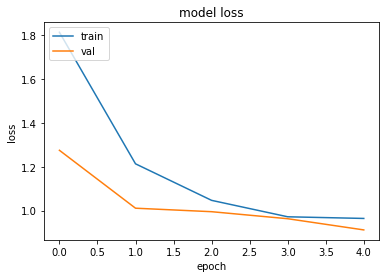

In [108]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

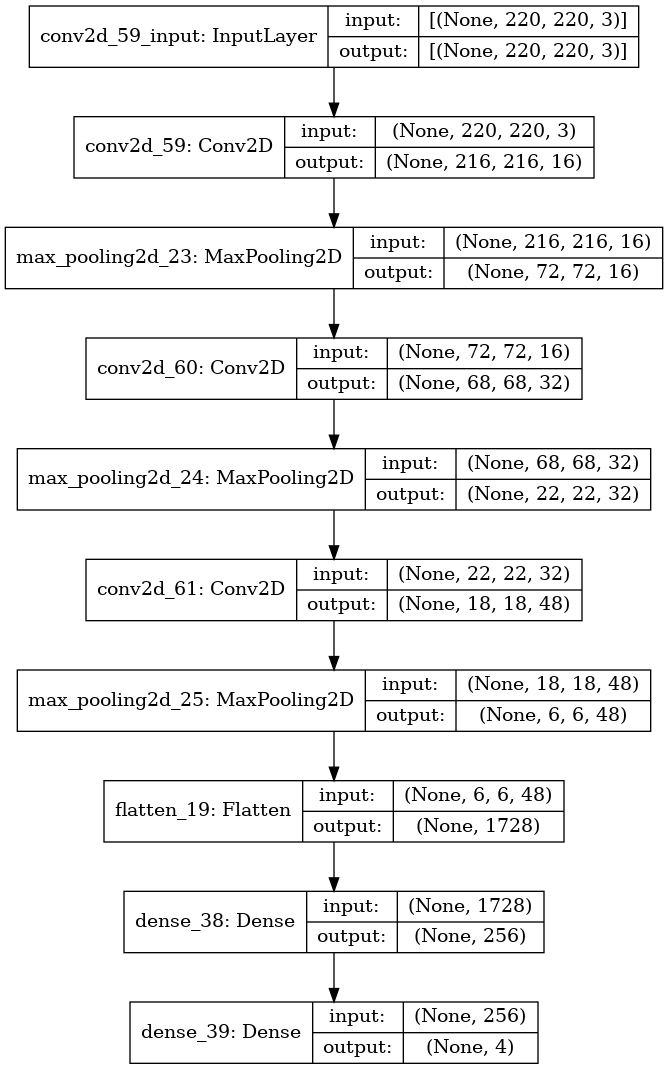

In [112]:
def cnn2(input_shape):
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(128, 2, padding='same', input_shape = input_shape, activation = 'LeakyReLU'))
    model.add(tf.keras.layers.AveragePooling2D(pool_size = (3,3),strides= (1,1)))
    
    model.add(tf.keras.layers.Conv2D(64, 3, padding='same', input_shape = input_shape, activation = 'LeakyReLU'))
    model.add(tf.keras.layers.AveragePooling2D(pool_size = (3,3),strides= (1,1)))
    
    model.add(tf.keras.layers.Conv2D(48, 2, padding='same', activation = 'LeakyReLU'))
    model.add(tf.keras.layers.AveragePooling2D(pool_size = (3,3),strides= (1,1)))
    
    model.add(tf.keras.layers.Flatten(input_shape = (3 ,4)))
    
    model.add(tf.keras.layers.Dense(units = 128, activation = 'LeakyReLU'))
    num_classes = 4
    
    model.add(tf.keras.layers.Dense(units = num_classes, activation = 'softmax'))
    
    return model    

model = cnn1(input_shape=(120,120) + (3,))

tf.keras.utils.plot_model(model, show_shapes=True)

In [113]:
epochs = 5

model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["categorical_accuracy"],
)

tensorBoard_CallBack = keras.callbacks.TensorBoard(log_dir='logs', histogram_freq=0, write_graph=True, write_images=True)

history = model.fit(
    train_dataset, epochs=epochs, callbacks=[tensorBoard_CallBack],
    validation_data=val_dataset
)

2022-12-01 03:18:51.229975: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-01 03:18:51.230110: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-01 03:18:51.230482: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/5
 1/38 [..............................] - ETA: 1:12 - loss: 1.3806 - categorical_accuracy: 0.3125

2022-12-01 03:18:54.125719: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-01 03:18:54.126116: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/38 [>.............................] - ETA: 36s - loss: 1.4301 - categorical_accuracy: 0.2344 

2022-12-01 03:18:55.269481: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-01 03:18:55.271046: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-01 03:18:55.272814: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./Graph2/train/plugins/profile/2022_12_01_03_18_55

2022-12-01 03:18:55.273957: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./Graph2/train/plugins/profile/2022_12_01_03_18_55/913ae53e8022.trace.json.gz
2022-12-01 03:18:55.277180: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./Graph2/train/plugins/profile/2022_12_01_03_18_55

2022-12-01 03:18:55.278002: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ./Graph2/train/plugins/profile/2022_12_01_03_18_55/913ae53e8022.memory_profile.json.gz
2022-12-01 03

38/38 [==============================] - 57s 1s/step - loss: 1.2569 - categorical_accuracy: 0.3904 - val_loss: 1.0784 - val_categorical_accuracy: 0.5067
Epoch 2/5
38/38 [==============================] - 55s 1s/step - loss: 1.1344 - categorical_accuracy: 0.4402 - val_loss: 1.1249 - val_categorical_accuracy: 0.5000
Epoch 3/5
38/38 [==============================] - 55s 1s/step - loss: 1.0374 - categorical_accuracy: 0.5116 - val_loss: 0.9407 - val_categorical_accuracy: 0.5767
Epoch 4/5
38/38 [==============================] - 56s 1s/step - loss: 0.9845 - categorical_accuracy: 0.5457 - val_loss: 0.8736 - val_categorical_accuracy: 0.5933
Epoch 5/5
38/38 [==============================] - 55s 1s/step - loss: 0.9733 - categorical_accuracy: 0.5797 - val_loss: 0.9058 - val_categorical_accuracy: 0.5667


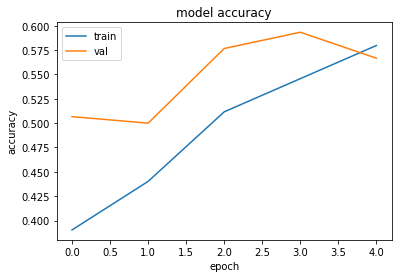

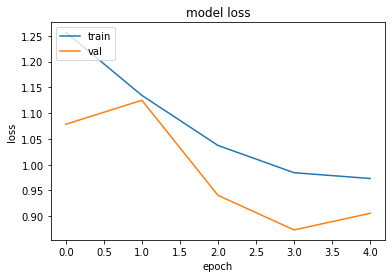

In [114]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [115]:
model.save("model2")

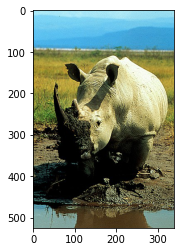

Actual: rhino
Predicted elephant


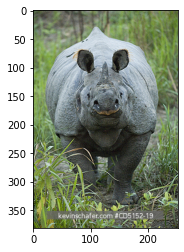

Actual: rhino
Predicted buffalo


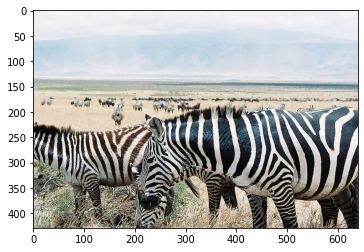

Actual: zebra
Predicted zebra


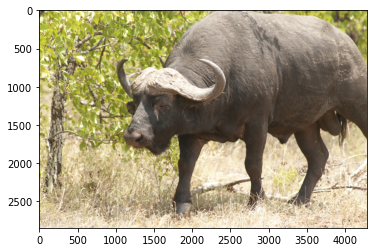

Actual: buffalo
Predicted buffalo


In [116]:
for i in r_d:
    img_pred(i, model)

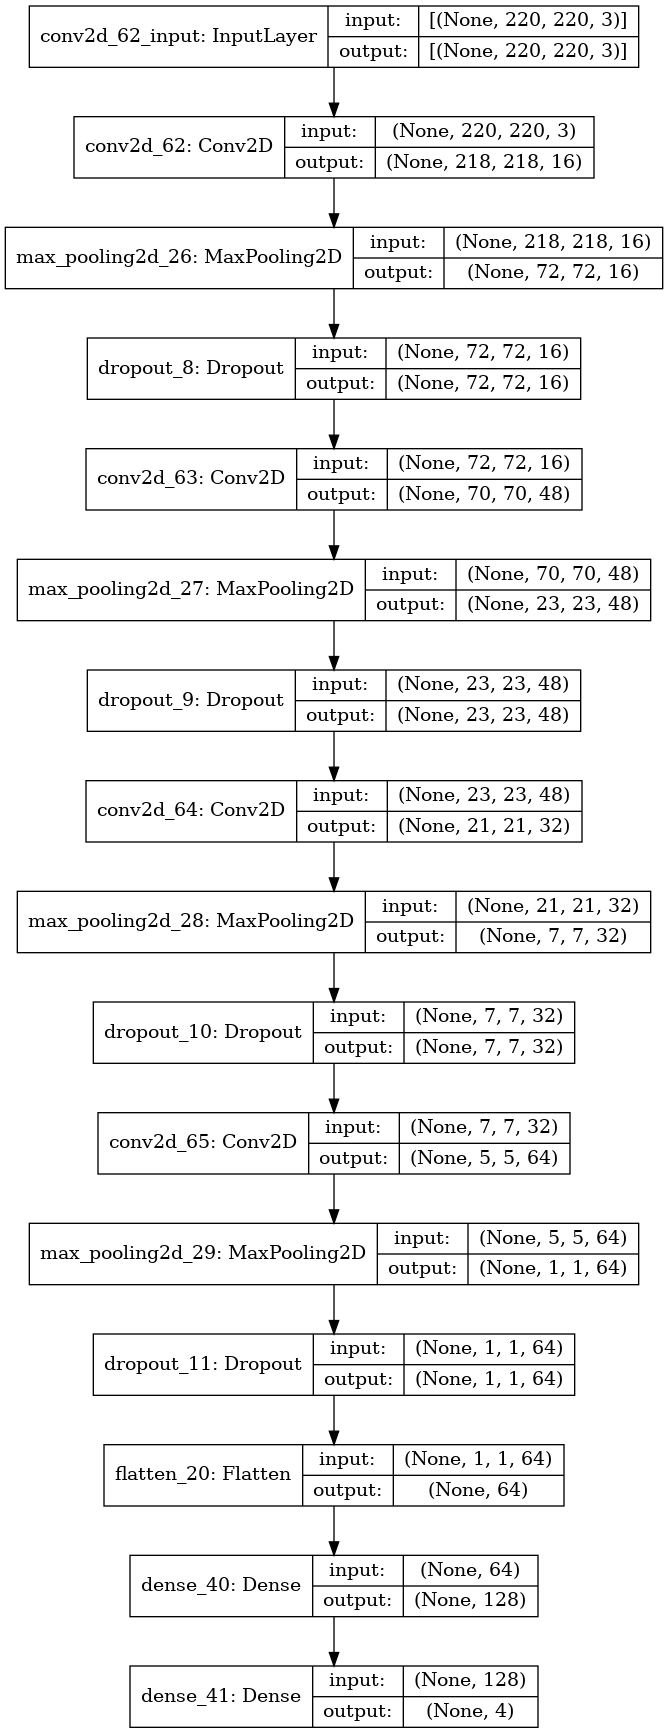

In [117]:
def cnn3(input_shape):
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(16, (3, 3), input_shape = input_shape, activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (3,3),strides=None))
    
    model.add(tf.keras.layers.Dropout(.2))

    model.add(tf.keras.layers.Conv2D(48, (3, 3), input_shape = input_shape, activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (3,3),strides=None))

    model.add(tf.keras.layers.Dropout(.2))


    model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape = input_shape, activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size,strides=None))

    model.add(tf.keras.layers.Dropout(.2))

    
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size,strides=None))

    model.add(tf.keras.layers.Dropout(.2))

    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
    num_classes = 4
    
    model.add(tf.keras.layers.Dense(units = num_classes, activation = 'softmax'))
    
    return model    

model = cnn3(input_shape=(220,220) + (3,))
tf.keras.utils.plot_model(model, show_shapes=True)

In [118]:
epochs = 28

model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=["binay_accuracy"],
)

tensorBoard_CallBack = keras.callbacks.TensorBoard(log_dir='logs', histogram_freq=0, write_graph=True, write_images=True)

history = model.fit(
    train_dataset, epochs=epochs, callbacks=[tensorBoard_CallBack],
    validation_data=val_dataset
)

2022-12-01 03:28:39.567157: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-01 03:28:39.567412: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-01 03:28:39.567936: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/28
 1/38 [..............................] - ETA: 1:25 - loss: 1.4563 - categorical_accuracy: 0.0938

2022-12-01 03:28:42.971668: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-01 03:28:42.972043: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/38 [>.............................] - ETA: 50s - loss: 1.4156 - categorical_accuracy: 0.2031 

2022-12-01 03:28:44.401191: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-01 03:28:44.403771: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-01 03:28:44.406268: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./Graph3/train/plugins/profile/2022_12_01_03_28_44

2022-12-01 03:28:44.407805: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./Graph3/train/plugins/profile/2022_12_01_03_28_44/913ae53e8022.trace.json.gz
2022-12-01 03:28:44.412943: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./Graph3/train/plugins/profile/2022_12_01_03_28_44

2022-12-01 03:28:44.414274: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ./Graph3/train/plugins/profile/2022_12_01_03_28_44/913ae53e8022.memory_profile.json.gz
2022-12-01 03

38/38 [==============================] - 53s 1s/step - loss: 1.3829 - categorical_accuracy: 0.2566 - val_loss: 1.3531 - val_categorical_accuracy: 0.3933
Epoch 2/28
38/38 [==============================] - 52s 1s/step - loss: 1.2655 - categorical_accuracy: 0.3588 - val_loss: 1.2951 - val_categorical_accuracy: 0.3467
Epoch 3/28
38/38 [==============================] - 52s 1s/step - loss: 1.1807 - categorical_accuracy: 0.4037 - val_loss: 1.0800 - val_categorical_accuracy: 0.4633
Epoch 4/28
38/38 [==============================] - 52s 1s/step - loss: 1.0987 - categorical_accuracy: 0.4452 - val_loss: 1.2169 - val_categorical_accuracy: 0.4167
Epoch 5/28
38/38 [==============================] - 52s 1s/step - loss: 1.1029 - categorical_accuracy: 0.4676 - val_loss: 1.0413 - val_categorical_accuracy: 0.4967
Epoch 6/28
38/38 [==============================] - 54s 1s/step - loss: 1.0557 - categorical_accuracy: 0.4767 - val_loss: 1.0222 - val_categorical_accuracy: 0.5267
Epoch 7/28
38/38 [=========

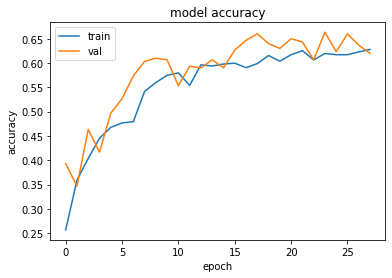

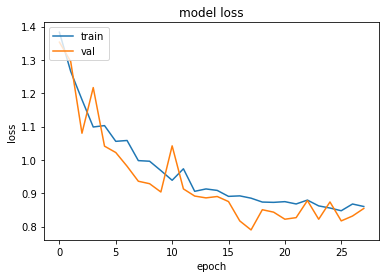

In [119]:
plt.plot(history.history['binay_accuracy'])
plt.plot(history.history['val_binay_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [120]:
model.save("mode3")

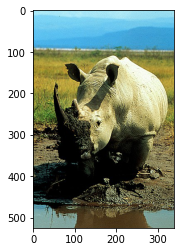

Actual: rhino
Predicted elephant


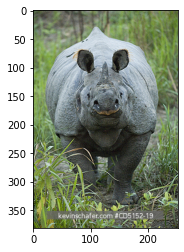

Actual: rhino
Predicted elephant


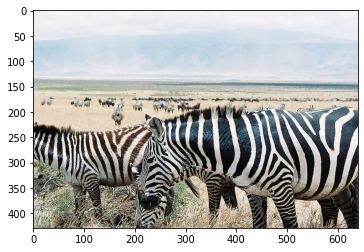

Actual: zebra
Predicted zebra


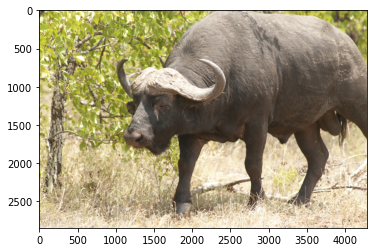

Actual: buffalo
Predicted elephant


In [121]:
for i in r_d:
    img_pred(i, model)

Resources:
